# DataTrained Practice Project 1

## Mushroom Analysis

### Table of content:
* [Introduction: The Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#Analysis)
* [End-Note and Way Forward](#conclusion)

### Introduction: The Problem <a name='introduction'></a>

<p>
    A mushroom is a fleshy, spore-bearing fruity body of a fungus found above ground, on soil, or on its food source. There are about 5.5 million species of mushrooms that have been identified. However, most of them are poisonous and non-edible. Consumption of such mushroom can lead to severe health hazards ranging from mild headaches to paralysis to even dead. It is, therefore, of paramount importance that mushrooms are correctly identified and classified into edible or poisonuos.
</p>
<p>
    In our case, we will limit our investigation to the Agaricus and Lepiota genus of mushrooms. The Agraricus genus contains both edible and poisonous species with over 300 members worldwide. The Lepiota genus, on the other hand, are extremely lethal and contains around 400 species worldwide.

</p>

### Data <a name="data"></a>

<p>
    The dataset contains attributes of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agraricus and Lepiota family.
</p>
<p>
    The data only contains non-numeric data for all of the 23 columns. Out of these columns, our target variable is the coloumn 'class'.
</p>

### Methodology <a name="methodology"></a>

<p>In this project, we will direct our attention to predict if a particular mushroom is edible or poisonous. Therefore, we have classification problem for this project. </p>

<p>We start the project by importing the dataset followed by some exploratory data analysis (EDA) to get an understanding of the data. The EDA process also gives us an oppurtunity to detect any problems or anomalies in the dataset. During the EDA process, we use the .info() function to get see if the dateset has missing values and to see the datatype of the each columns. Then we use .shape find the number of rows and columns in the dataset followed by a bivaraite analysis of the target variable to see if the dataset is balanced or not.</p>

<p>After EDA, we perform some data preprocessing in order to convert the non-numeric data in to numeric data following which we start building our model</p>

###### Exploratory Data Analysis and Data Preprocessing

In [1]:
#importing all necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from scipy.stats import zscore
import joblib

In [2]:
#setting to display all rows and coloumns instead of just the first five and last five
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)
#pd.set_option('display.expand_frame_repr', False) #'display.max_rows', None

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


In [3]:
#importing the dataset
mushroomDf = pd.read_csv('mushrooms.csv')
mushroomDf.head()

class cap-shape cap-surface cap-color bruises odor gill-attachment gill-spacing gill-size gill-color stalk-shape stalk-root stalk-surface-above-ring stalk-surface-below-ring stalk-color-above-ring stalk-color-below-ring veil-type veil-color ring-number ring-type spore-print-color population habitat
0  p     x         s           n         t       p    f               c            n         k          e           e          s                        s                        w                      w                      p         w          o           p         k                 s          u     
1  e     x         s           y         t       a    f               c            b         k          e           c          s                        s                        w                      w                      p         w          o           p         n                 n          g     
2  e     b         s           w         t       l    f               c            b         n          e           c          s                        s                        w                      w                      p         w          o           p         n                 n          m     
3  p     x         y           w         t       p    f               c            n         n          e           e          s                        s                        w                      w                      p         w          o           p         k                 s          u     
4  e     x         s           g         f       n    f               w            b         k          t           e          s                        s                        w                      w                      p         w          o           e         n                 a          g

In [4]:
mushroomDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

All the columns in the dataset contains non-numeric data.

In [5]:
mushroomDf.shape

(8124, 23)

From the results above, we have 8,124 rows and 23 columns in our dataset.

In [6]:
mushroomDf.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

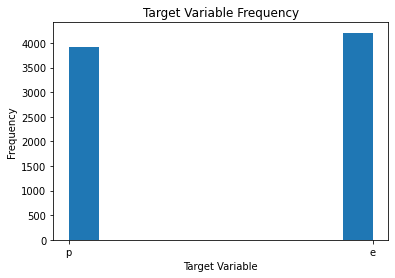

In [7]:
#univariate analysis
plt.title('Target Variable Frequency')
plt.xlabel('Target Variable')
plt.ylabel('Frequency')
plt.hist(mushroomDf['class'])
plt.show()

From the graph above, we can see that 'p' occurs approximately 3900 times while 'e' occurs around 4200 times.

In [8]:
e = 4200
p = 3900
ePerc = (4200/(4200+3900))*100
print(f"The value 'e' and 'p' represents {ePerc}% and {100-ePerc}% respectively of the date and hence the dataset is more or less balanced.")

The value 'e' and 'p' represents 51.85185185185185% and 48.14814814814815% respectively of the date and hence the dataset is more or less balanced.


Now, we will focus on converting the non-numeric data in the dataset to numeric ones so that we can perform our analysis and build our model. Since the coloumns contain categorical nominal data, it is prudent to perform OneHotEncoding on all of the columns except the target  column which is the column 'class' which is treated using sklearn.preprocessing's LabelEncoder.

In [9]:
columns = list(mushroomDf.columns) #Creating a list of all column names
columns = columns[1::] #Since the target column is 'class' at index = 0, I am keeping all the columns except the 'class' column
mushroomDfEncoded = pd.get_dummies(mushroomDf, columns=columns)
mushroomDfEncoded.shape

(8124, 118)

In [10]:
#Converting the target column 'class' using LabelEncoder
le = LabelEncoder()
mushroomDfEncoded['class'] = le.fit_transform(mushroomDfEncoded['class'])
mushroomDfEncoded.head()

class  cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  cap-shape_x  cap-surface_f  cap-surface_g  cap-surface_s  cap-surface_y  cap-color_b  cap-color_c  cap-color_e  cap-color_g  cap-color_n  cap-color_p  cap-color_r  cap-color_u  cap-color_w  cap-color_y  bruises_f  bruises_t  odor_a  odor_c  odor_f  odor_l  odor_m  odor_n  odor_p  odor_s  odor_y  gill-attachment_a  gill-attachment_f  gill-spacing_c  gill-spacing_w  gill-size_b  gill-size_n  gill-color_b  gill-color_e  gill-color_g  gill-color_h  gill-color_k  gill-color_n  gill-color_o  gill-color_p  gill-color_r  gill-color_u  gill-color_w  gill-color_y  stalk-shape_e  stalk-shape_t  stalk-root_?  stalk-root_b  stalk-root_c  stalk-root_e  stalk-root_r  stalk-surface-above-ring_f  stalk-surface-above-ring_k  stalk-surface-above-ring_s  stalk-surface-above-ring_y  stalk-surface-below-ring_f  stalk-surface-below-ring_k  stalk-surface-below-ring_s  stalk-surface-below-ring_y  stalk-color-above-ring_b  stalk-color-above-ring_c  stalk-color-above-ring_e  stalk-color-above-ring_g  stalk-color-above-ring_n  stalk-color-above-ring_o  stalk-color-above-ring_p  stalk-color-above-ring_w  stalk-color-above-ring_y  stalk-color-below-ring_b  stalk-color-below-ring_c  stalk-color-below-ring_e  stalk-color-below-ring_g  stalk-color-below-ring_n  stalk-color-below-ring_o  stalk-color-below-ring_p  stalk-color-below-ring_w  stalk-color-below-ring_y  veil-type_p  veil-color_n  veil-color_o  veil-color_w  veil-color_y  ring-number_n  ring-number_o  ring-number_t  ring-type_e  ring-type_f  ring-type_l  ring-type_n  ring-type_p  spore-print-color_b  spore-print-color_h  spore-print-color_k  spore-print-color_n  spore-print-color_o  spore-print-color_r  spore-print-color_u  spore-print-color_w  spore-print-color_y  population_a  population_c  population_n  population_s  population_v  population_y  habitat_d  habitat_g  habitat_l  habitat_m  habitat_p  habitat_u  habitat_w
0  1      0            0            0            0            0            1            0              0              1              0              0            0            0            0            1            0            0            0            0            0            0          1          0       0       0       0       0       0       1       0       0       0                  1                  1               0               0            1            0             0             0             0             1             0             0             0             0             0             0             0             1              0              0             0             0             1             0             0                           0                           1                           0                           0                           0                           1                           0                           0                         0                         0                         0                         0                         0                         0                         1                         0                         0                         0                         0                         0                         0                         0                         0                         1                         0                         1            0             0             1             0             0              1              0              0            0            0            0            1            0                    0                    1                    0                    0                    0                    0                    0                    0                    0             0             0             1             0             0             0          0          0          0          0          1          0        
1  0      0            0            0            0            0            1            0  

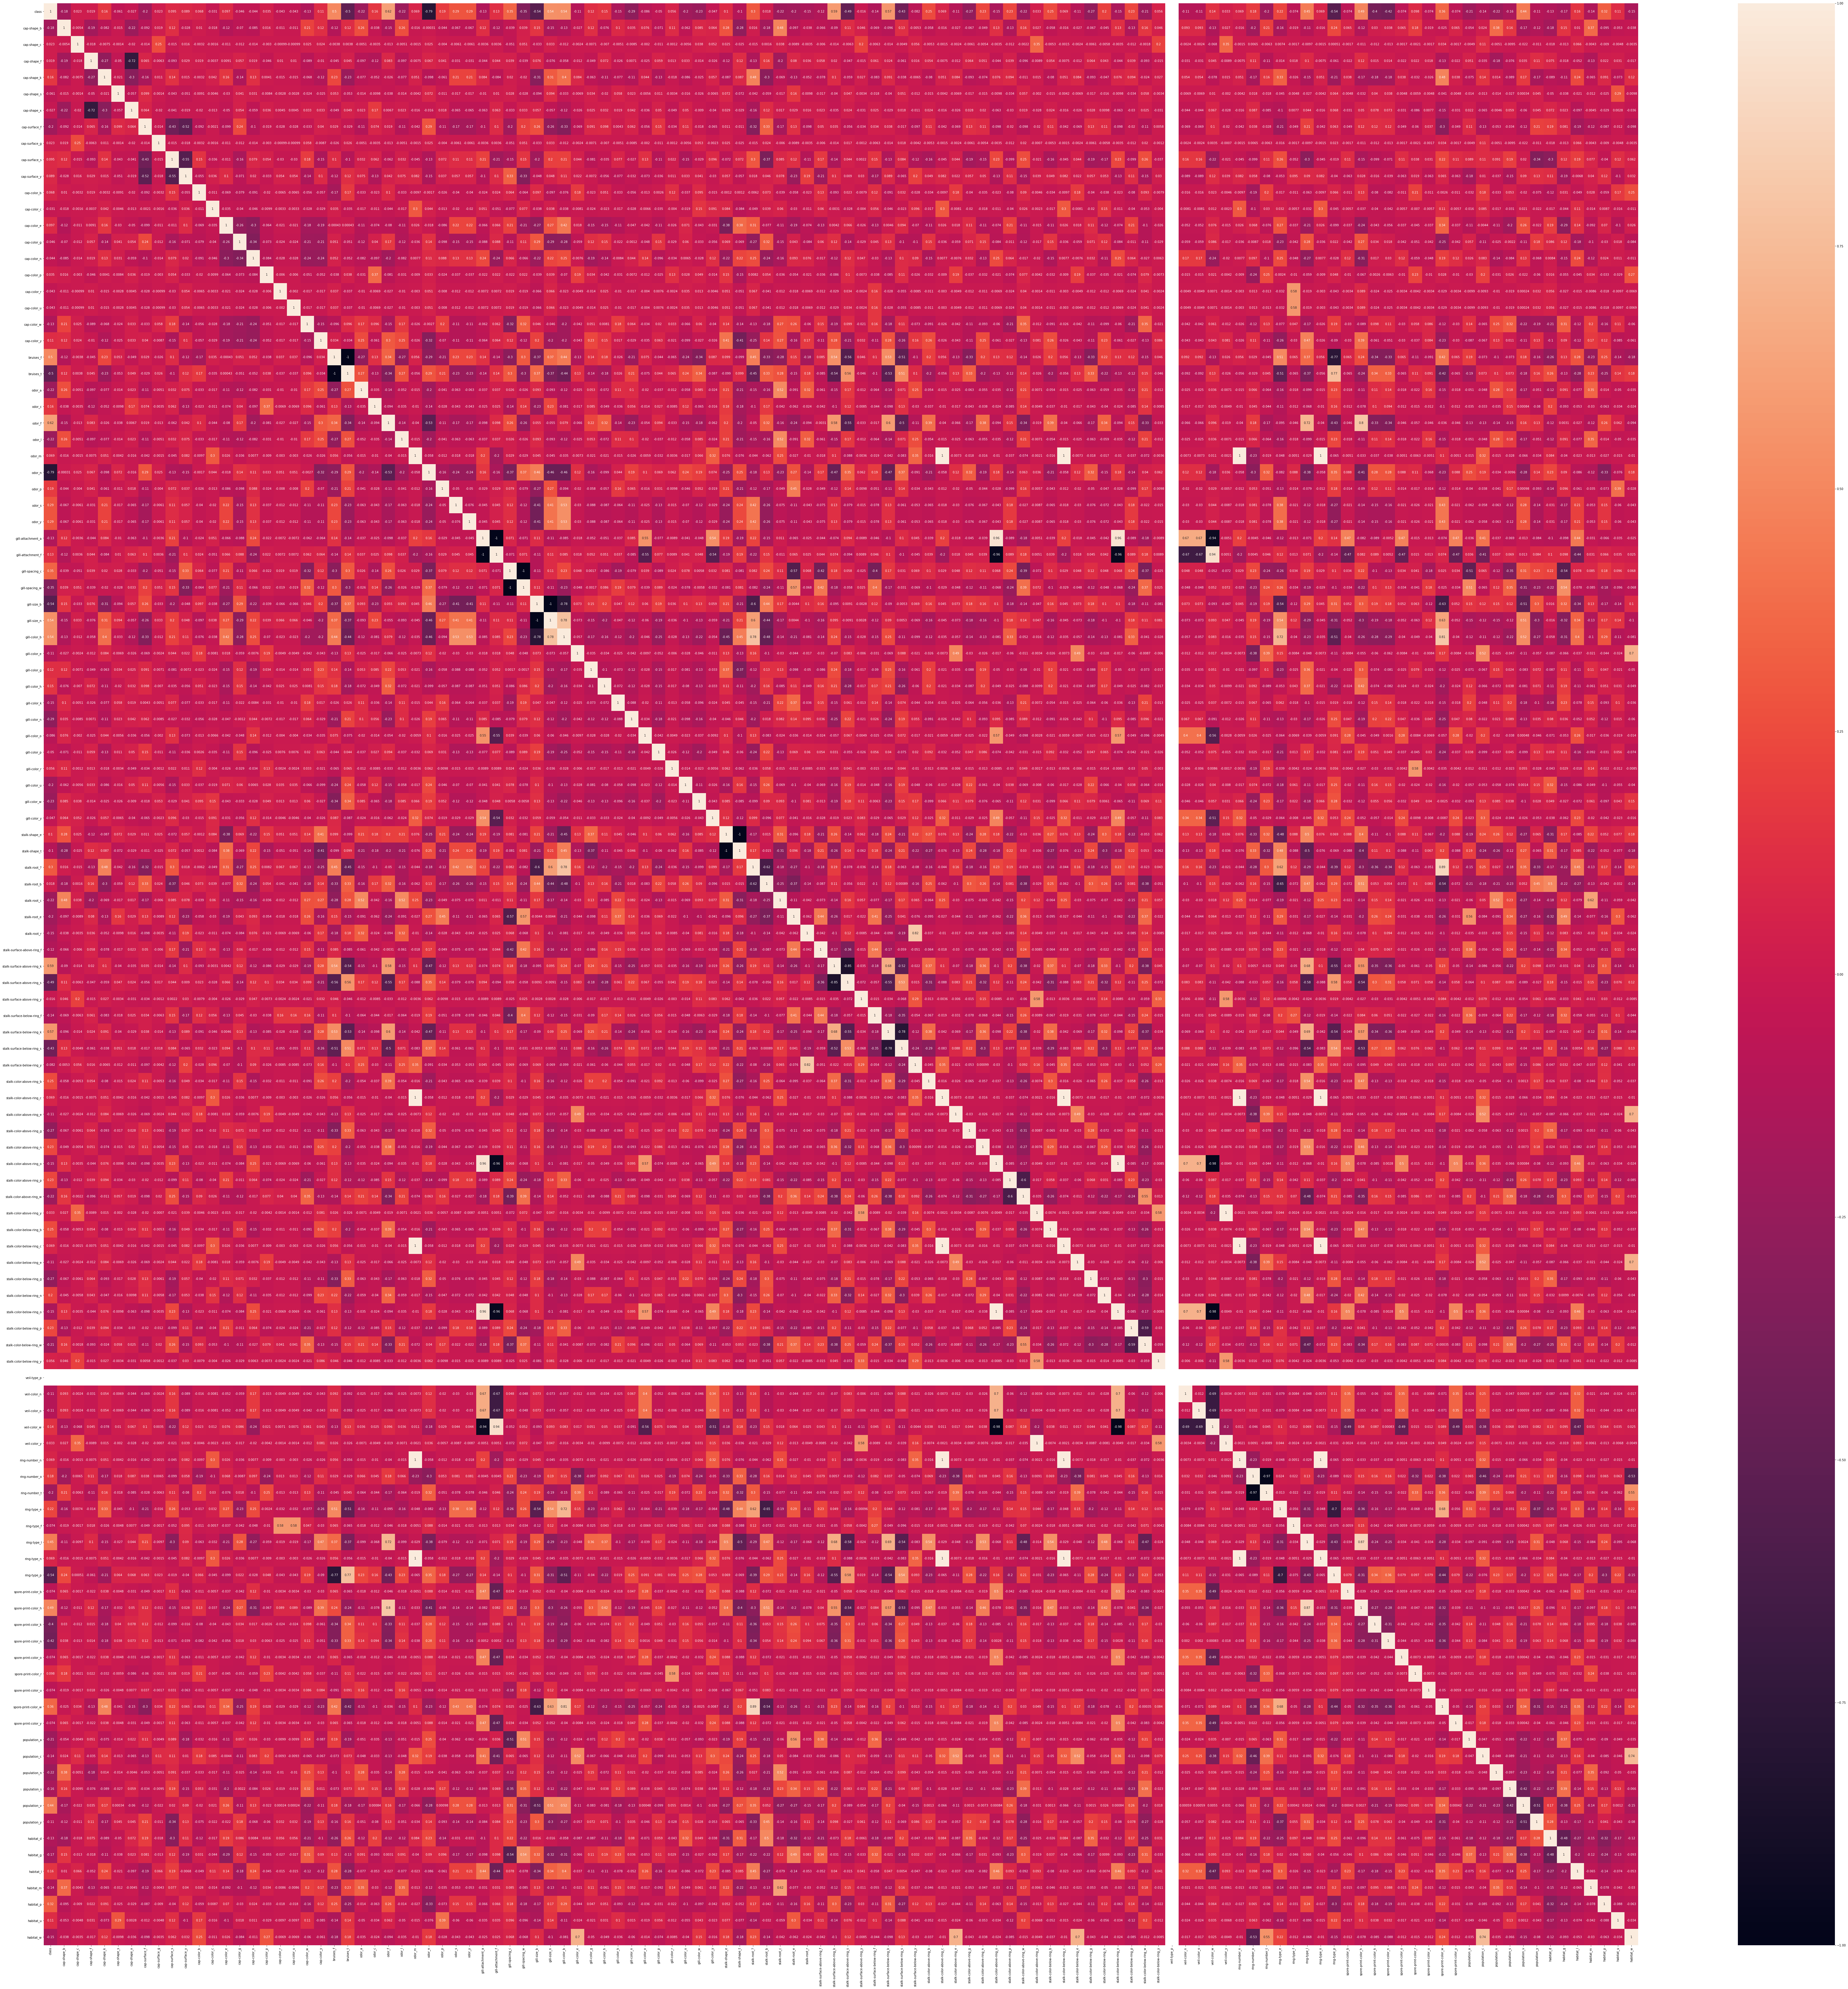

In [11]:
plt.figure(figsize=(120,120))
sns.heatmap(mushroomDfEncoded.corr(), annot=True)
plt.show()

In [12]:
mushroomDfEncoded.dtypes

class          int32
cap-shape_b    uint8
cap-shape_c    uint8
cap-shape_f    uint8
cap-shape_k    uint8
               ...  
habitat_l      uint8
habitat_m      uint8
habitat_p      uint8
habitat_u      uint8
habitat_w      uint8
Length: 118, dtype: object

In [13]:
corrMatrix = mushroomDfEncoded.corr()
corrMatrix['class'].sort_values(ascending=False)

class                         1.000000
odor_f                        0.623842
stalk-surface-above-ring_k    0.587658
stalk-surface-below-ring_k    0.573524
gill-size_n                   0.540024
                                ...   
bruises_t                    -0.501530
gill-size_b                  -0.540024
ring-type_p                  -0.540469
odor_n                       -0.785557
veil-type_p                  NaN      
Name: class, Length: 118, dtype: float64

### Analysis <a name= "Analysis"></a>

<p>We start our analysis by seperating the target variable, y, from the rest of the data. This is followed by finding the best random state for which the model has the highest accuracy. Once the best random state is identified, we try three classification algorithms (LogisticRegression, Support Vector Clssifier and RandomForestClassifier) on the data set and calculate the evaluation metrics including accuracy score for each of these algorithms.</p>
<p>
    The next step in our analysis is to find the cross-validation scores for each of the four classification algorithms and the calulating the difference in their accuracy and cross-validation scores. The algorithm with the least difference in the scores is chosen as the final model.
</p>
<p>
    Finally we perform hyperparameter tuning using GridSearchCV to further tune the final model to increase it's accuracy further. Then we save the model using joblib and test the saved model by loadin it again.
</p>

In [14]:
x = mushroomDfEncoded.drop('class', axis=1)
y = mushroomDfEncoded['class']

###### Finding the best random state

In [15]:
#Finding the best random state
maxAcc = 0
maxRs = 0
for randState in range(0,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=randState)
    lr = LogisticRegression()
    lr.fit(x_train, y_train)
    predlr = lr.predict(x_test)
    acc = accuracy_score(y_test, predlr)
    if acc>maxAcc:
        maxAcc=acc
        maxRs=randState
print(f"Best accuracy is {maxAcc*100}% on Random state {randState}")

Best accuracy is 100.0% on Random state 199


###### Algorithm 1: Logistic Regression

In [16]:
x_train199, x_test199, y_train199, y_test199 = train_test_split(x, y, test_size=0.30, random_state=199)
lr = LogisticRegression()
lr.fit(x_train199, y_train199)
Ypredlr = lr.predict(x_test199)
print(accuracy_score(Ypredlr, y_test199))
print(confusion_matrix(Ypredlr, y_test199))
print(classification_report(Ypredlr, y_test199))

1.0
[[1257    0]
 [   0 1181]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



###### Algorithm 2: Support Vector Classifier

In [17]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train199, y_train199)
Ypredsvc = svc.predict(x_test199)
print(accuracy_score(Ypredsvc, y_test199))
print(confusion_matrix(Ypredsvc, y_test199))
print(classification_report(Ypredsvc, y_test199))

1.0
[[1257    0]
 [   0 1181]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



###### Algorithm 3: RandomForestClassifier

In [18]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_test199, y_test199)
Ypredrfc = rfc.predict(x_test199)
print(accuracy_score(Ypredrfc, y_test199))
print(confusion_matrix(Ypredrfc, y_test199))
print(classification_report(Ypredrfc, y_test199))

1.0
[[1257    0]
 [   0 1181]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



##### LogisticRegression's Cross-validation score

In [19]:
from sklearn.model_selection import cross_val_score

src = cross_val_score(lr, x, y, cv=5)
print(f'Cross Validation score for LogisticRegression is {src.mean()}')
print(f'Difference between Accuracy and Cross Validation Score for LogisticRegression is {1-src.mean()}')

Cross Validation score for LogisticRegression is 0.9193427813565744
Difference between Accuracy and Cross Validation Score for LogisticRegression is 0.08065721864342557


##### Support Vector Classifier's ross-validation score

In [20]:
from sklearn.model_selection import cross_val_score

srcSvc = cross_val_score(svc, x, y, cv=5)
print(f'Cross Validation score for SVC is {srcSvc.mean()}')
print(f'Difference between Accuracy and Cross Validation Score for SVC is {1-srcSvc.mean()}')

Cross Validation score for SVC is 0.8757588480485033
Difference between Accuracy and Cross Validation Score for SVC is 0.12424115195149665


##### RandomForestClassifier's Cross-validation score

In [21]:
from sklearn.model_selection import cross_val_score

srcRfc = cross_val_score(rfc, x, y, cv=5)
print(f'Cross Validation score for RandomForestClassifier is {srcRfc.mean()}')
print(f'Difference between Accuracy and Cross Validation Score for RandomForestClassifier is {1-srcRfc.mean()}')

Cross Validation score for RandomForestClassifier is 0.9263740810913225
Difference between Accuracy and Cross Validation Score for RandomForestClassifier is 0.07362591890867753


<table>
    <thead>
        <tr>
            <th>Classifier</th>
            <th>Accuracy Score</th>
            <th>Cross Validation Score</th>
            <th>Score Difference</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Logistic Regression</td>
            <td>1</td>
            <td>0.91934</td>
            <td>0.08061</td>
        </tr>
        <tr>
            <td>SVC</td>
            <td>1</td>
            <td>0.87576</td>
            <td>0.12424</td>
        </tr>
        <tr>
            <td style='color:green'>Random Forest Classifier</td>
            <td style='color:green'>1</td>
            <td style='color:green'>0.91517</td>
            <td style='color:green'>0.07978</td>
        </tr>
    </tbody>
</table>

<p>
    From the table above, we can see that the difference in accuracy score and cross-validation score is least in case of RandomForestClassifier. Therefore, out of the three models tried in this analysis, this is the best model for the given dataset. However, we can still try to increase the accuracy of this model by hyper parameter tuning. We shall do this in the next few cells.
</p>

###### Hyper Parameter Tuning

In [22]:
from sklearn.model_selection import GridSearchCV
parameters = {'criterion' : ['gini', 'entropy'],
             'max_depth': np.arange(2, 15),
             'n_estimators' : [10, 50, 75, 150, 300, 600]}

gs = GridSearchCV(RandomForestClassifier(), parameters, cv=5)

In [23]:
gs.fit(x_train199, y_train199)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'n_estimators': [10, 50, 75, 150, 300, 600]})

In [24]:
gs.best_params_

{'criterion': 'gini', 'max_depth': 7, 'n_estimators': 75}

In [25]:
newRfc = RandomForestClassifier(criterion = 'gini', max_depth = 7, n_estimators = 50, random_state = 199)
newRfc.fit(x_test199, y_test199)
Yprednewrfc = newRfc.predict(x_test199)
print(accuracy_score(Yprednewrfc, y_test199)*100)
print(confusion_matrix(Yprednewrfc, y_test199))
print(classification_report(Yprednewrfc, y_test199))

100.0
[[1257    0]
 [   0 1181]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



Saving the model

In [26]:
joblib.dump(newRfc, 'mushroomModel.pkl')

['mushroomModel.pkl']

Checking the saved model

In [27]:
model = joblib.load('mushroomModel.pkl')

In [28]:
model.predict(x_test) #Since no error occured, the model was saved properly and is ok for deployment

array([0, 0, 0, ..., 1, 0, 0])

### End-Note and Way Forward<a name = "conclusion"></a>

<p>
    Althought all the three classification algorithms performed extremely well and had 100% accuracy score from the start, it was likely due to overfitting and this porblem was solved by selecting the RandomForestClassifier after finding their cross-validation scores and accuracy-cross validation score difference. However, after hyper parameter tuning, the accuracy score was 100% again. But since we have already done our due deligence to remove any overfitting, this possibility is rulled out. In such case, the only other logical possibility is that the data is so well callibrated with the target variable that it fits the model perfectly.
</p>
<p>
    There is still, however, a need to monitor the accuracy of the model in real world scenerio as the accuracy score might differ when the model encounters completely unseen data. This new unseen data can serve as a validation set of data and confirm our models accuracy.
</p>